In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%pip install decorator==5.0.9

import imp
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing local modules

import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils
import features.tf_idf.n_gram as thesisTfIdfNgramFeatures
import similarities.cosine as thesisCosineSimilarities

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)
imp.reload(thesisCosineSimilarities)

<module 'similarities.cosine' from '../src/similarities/cosine.py'>

In [4]:
########
# In order to test new feature 
# you need to change only this functions
########
get_features = thesisTfIdfNgramFeatures.create_5_gram
get_zwickau_features = thesisTfIdfNgramFeatures.create_zwickau_5_gram
get_london_feature = thesisTfIdfNgramFeatures.create_london_5_gram

In [5]:
thesisDataReader.read_zwickau().replace(".", "\n")

zwickau_corpus = thesisCleanUp.create_corpus_by_line(
    thesisCleanUp.jvtext(
        thesisDataReader
            .read_zwickau()
            .replace('40 000', '40000')
            .replace('III.', 'III')
            .replace('IV.', 'IV')
            .replace(".", "\n")
            .replace("?", "\n")
            .replace("!", "\n")
    )
)
london_corpus = thesisCleanUp.create_corpus_by_line(
    thesisCleanUp.jvtext(
        thesisDataReader
            .read_london()
            .replace('40 000', '40000')
            .replace(".", "\n")
            .replace("?", "\n")
            .replace("!", "\n")
    )
)

zwickau_corpus = list(filter(None, zwickau_corpus))
london_corpus = list(filter(None, london_corpus))

zwickau_corpus = [t.strip() for t in zwickau_corpus]
london_corpus = [t.strip() for t in london_corpus]

In [6]:
zwickau_corpus

['incipit descripcio terre sancte',
 'cum sicut dicit ieronimus quosdam inueniamus lustrasse prouincias maria transfretasse ut ea que ex scripturis nouerant coram uiderent ut plato memphiticos uates et egiptum appollonius qui persas intrauit transiuit cancasum albanos stichas massagetas quoque ut yarcham uideret et tandem egiptum intrauit ut famosam mensam solis uideret in sabulo quid mirum si christiani terram illam quam christi sonant ecclesie uniuerse uidere et uisitare desiderant',
 'uenerabantur antiqui sancta sanctorum quia ibi erat archa testamenti et chernibulum cum propiciatorio et manna et uirga aaron que fronduerat que omnia erant umbra',
 'nonne uenerabilius est apud nos sepulcrum dulcis ihesu quod quotiens quis ingreditur totiens inuolutum syndone mentis oculis uidet saluatorem et paululum procedens uidet lapidem reuolutum angelum in eo sedentem et sudarium cum linthiaminibus mulieribus ostendentem',
 'quis christianus hiis uisis non festinabit uenire in bethleem contempla

In [7]:
def show_similarities_data(similarities):
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        print('___ max similariry for paragraph: {} ___'.format(index))
        for i in max_indices:
            print('index: [{}] value: {}'.format(i, similarities[index][i]))
        print('average: {}'.format(np.average(value)))

        unique, counts = np.unique(value, return_counts=True)
        unique_dictionary = dict(zip(unique, counts))
        print('0 similarities: {}'.format(unique_dictionary.get(0.0)))

        print()

In [8]:
zwickau_df = thesisTfIdfNgramFeatures.create_5_gram(zwickau_corpus)
zwickau_similarities = cosine_similarity(zwickau_df, zwickau_df)

In [9]:
london_df = thesisTfIdfNgramFeatures.create_5_gram(london_corpus)
london_similarities = cosine_similarity(london_df, london_df)

In [10]:
def get_max_similarity_per_p(similarities):
    res = []
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        max_indices_without_self = max_indices[:-1]
        max_similarity = value[max_indices_without_self[-1]]
        res.append(max_similarity)
    return res

In [11]:
zwickau_max_similarity_per_p = get_max_similarity_per_p(zwickau_similarities)
london_max_similarity_per_p = get_max_similarity_per_p(london_similarities)

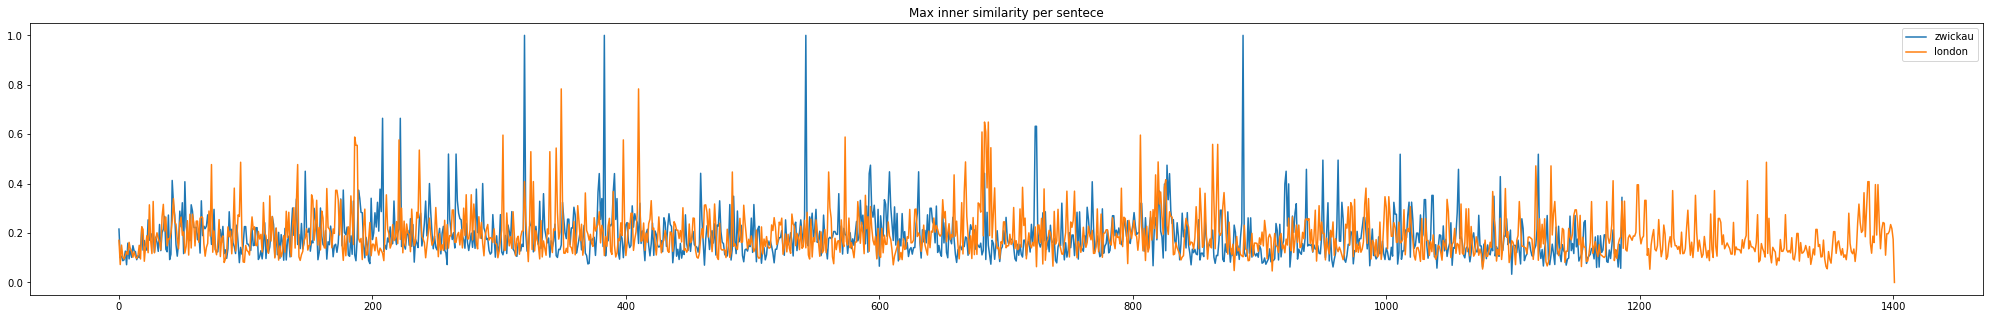

In [12]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(35, 5))
ax.plot(zwickau_max_similarity_per_p, label="zwickau")
ax.plot(london_max_similarity_per_p, label="london")
ax.legend()
plt.title('Max inner similarity per sentece')
plt.show()

In [13]:
def cross_version_similarity(version_1_corpus, version_2_corpus):
    res = []
    for i, p in enumerate(version_1_corpus):
        temp_corpus = [p] + version_2_corpus
        df_features = get_features(temp_corpus)
        temp_similarities = cosine_similarity(df_features, df_features)
        res.append(temp_similarities[0])
    return res

In [14]:
# zwickau_london_similarities = cross_version_similarity(zwickau_corpus, london_corpus)
zwickau_london_similarities = np.load('../computed_data/similarities/zwickau_london_tfifd_5gram_sentence_similarities.npy')

In [16]:
# london_zwickau_similarities = cross_version_similarity(london_corpus, zwickau_corpus)
london_zwickau_similarities = np.load('../computed_data/similarities/london_zwickau_tfifd_5gram_sentence_similarities.npy')

In [19]:
# show_similarities_data(zwickau_london_similarities)

In [20]:
# show_similarities_data(london_zwickau_similarities)

In [21]:
zwickau_london_max_similarity_per_p = get_max_similarity_per_p(zwickau_london_similarities)

In [22]:
london_zwickau_max_similarity_per_p = get_max_similarity_per_p(london_zwickau_similarities)

In [23]:
# np.save('../computed_data/similarities/zwickau_london_tfifd_5gram_sentence_similarities.npy', zwickau_london_similarities)

In [24]:
# np.save('../computed_data/similarities/london_zwickau_tfifd_5gram_sentence_similarities.npy', london_zwickau_similarities)

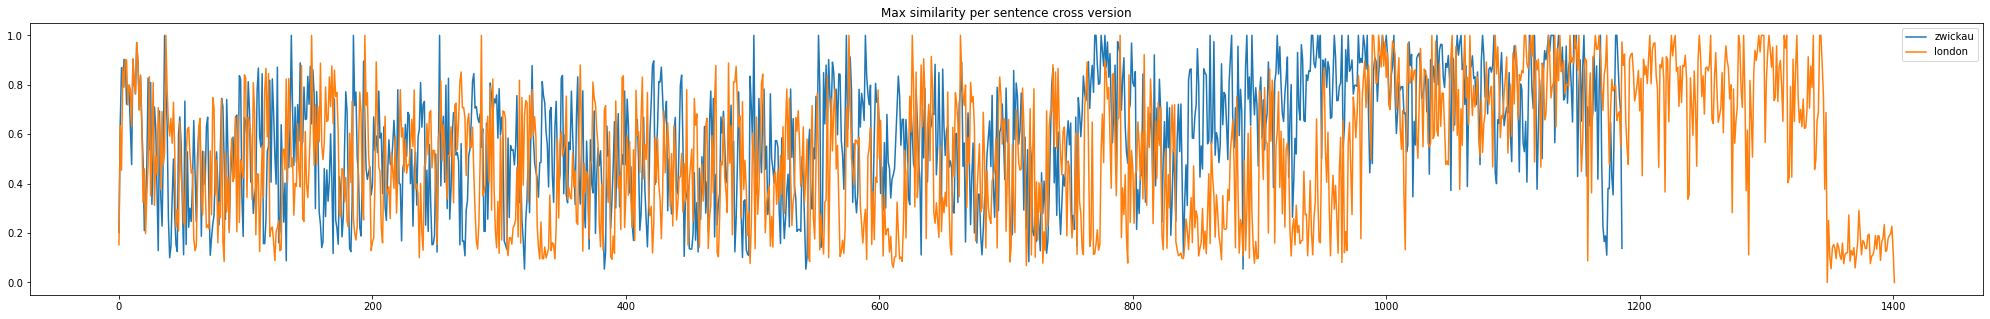

In [25]:
fig, ax = plt.subplots(figsize=(35, 5))
ax.plot(zwickau_london_max_similarity_per_p, label="zwickau")
ax.plot(london_zwickau_max_similarity_per_p, label="london")
ax.legend()
plt.title('Max similarity per sentence cross version')
plt.show()

In [ ]:
def plot_sentence_similarity(zwickau_similarities_df, london_similarities_df, start, end):
    %matplotlib inline
    num_of_subplots = end - start
    fig, axes = plt.subplots(num_of_subplots, 1, figsize=(35,900))
    axes_arr = axes.ravel()
    
    for i in range(0, num_of_subplots):
        ax = axes_arr[i]
        i = start + i
        ax.set_title(f'sentence {i}')
    
        if i in list(zwickau_similarities_df.index):
            y_1 = zwickau_similarities_df.iloc[i, :]
            ax.plot(y_1, color='orange', label='a_zwickau')
    
        if i in list(london_similarities_df.index):
            y_2 = london_similarities_df.iloc[i, :]
            ax.plot(y_2, label='b_london')
        
        ax.grid()
        ax.set_ylim([0,1])
        ax.legend()

plt.show()

In [ ]:
zwickau_inner_similarities_df = pd.DataFrame(zwickau_similarities)
london_inner_similarities_df = pd.DataFrame(london_similarities)

In [ ]:
# plot_sentence_similarity(zwickau_inner_similarities_df, london_inner_similarities_df, 0, 318)

In [ ]:
# plot_sentence_similarity(zwickau_inner_similarities_df, london_inner_similarities_df, 318, 636)

In [ ]:
# plot_sentence_similarity(zwickau_inner_similarities_df, london_inner_similarities_df, 318*2, 318*3)

In [ ]:
# plot_sentence_similarity(zwickau_inner_similarities_df, london_inner_similarities_df, 318*3, 318*4)

In [ ]:
# plot_sentence_similarity(zwickau_inner_similarities_df, london_inner_similarities_df, 318*4, 1391)

In [26]:
zwickau_london_similarities_df = pd.DataFrame(zwickau_london_similarities)
london_zwickau_similarities_df = pd.DataFrame(london_zwickau_similarities)

In [ ]:
# plot_sentence_similarity(zwickau_london_similarities_df, london_zwickau_similarities_df, 318*0, 318*1)

In [ ]:
# plot_sentence_similarity(zwickau_london_similarities_df, london_zwickau_similarities_df, 318*1, 318*2)

In [ ]:
# plot_sentence_similarity(zwickau_london_similarities_df, london_zwickau_similarities_df, 318*2, 318*3)

In [ ]:
# plot_sentence_similarity(zwickau_london_similarities_df, london_zwickau_similarities_df, 318*3, 318*4)

In [ ]:
# plot_sentence_similarity(zwickau_london_similarities_df, london_zwickau_similarities_df, 318*4, 1391)

In [27]:
zwickau_london_text_aligment_data_frame_data = []
zwickau_london_text_aligment_data_frame_cols = ['london_s_#', 'similarity_score', 'zwickau', 'london']

for index, row in zwickau_london_similarities_df.iterrows():
    best_smltr = thesisCosineSimilarities.get_ordered_similatiries_without_self(row)[0]
    
    similar_p = best_smltr[0]
    smlt_score = best_smltr[1]

    zwickau_text = zwickau_corpus[index]
    london_text = london_corpus[similar_p]
    
    data = [similar_p, smlt_score, zwickau_text, london_text]
    zwickau_london_text_aligment_data_frame_data.append(data)

In [28]:
zwickau_london_text_aligment_df = pd.DataFrame(data=np.array(zwickau_london_text_aligment_data_frame_data), columns=zwickau_london_text_aligment_data_frame_cols)

In [29]:
zwickau_london_text_aligment_df

,london_s_#,similarity_score,zwickau,london
0,24,0.20200096957419722,incipit descripcio terre sancte,descripcio terre sancte sciendum autem est in ...
1,1,0.6426602088703339,cum sicut dicit ieronimus quosdam inueniamus l...,cum in ueteribus hystoriis legamus sicut dicit...
2,3,0.8689847794690747,uenerabantur antiqui sancta sanctorum quia ibi...,uanerabantur antiqui sancta sanctorum quia ibi...
3,4,0.7887163159671424,nonne uenerabilius est apud nos sepulcrum dulc...,nonne aput nos uenerabilis est sepulchrum dulc...
4,5,0.9026101458462035,quis christianus hiis uisis non festinabit uen...,quis christianus hiis uisis non festinet uenir...
...,...,...,...,...
1182,1343,1.0000000000000002,breuiter non reliqui locum in ciuitate quem no...,breuiter non reliqui locum in ciuitate quem no...
1183,1344,0.8788108500803723,de roma per arecium et florentiam ueni bonnoni...,de roma per arecium et florentiam ueni bononia...
1184,1345,0.7503387308254023,5 diebus apud eum mansi circa festum lucie,quinque diebus aput eum mansi circa festum lucie
1185,1347,0.6904030198381459,recedens de bononia per pistorium ueni lucam i...,ibi uidi crucem lucanam que dicitur dedisse ia...


In [30]:
zwickau_london_text_aligment_df.to_csv('../computed_data/text_to_text/5_gram_sentence_aligment_zwickau_to_london.csv')

In [31]:
london_zwickau_text_aligment_data_frame_data = []
london_zwickau_text_aligment_data_frame_cols = ['zwickau_s_#', 'similarity_score', 'london', 'zwickau']

for index, row in london_zwickau_similarities_df.iterrows():
    best_smltr = thesisCosineSimilarities.get_ordered_similatiries_without_self(row)[0]
    
    similar_p = best_smltr[0]
    smlt_score = best_smltr[1]
    
    london_text = london_corpus[index]
    zwickau_text = zwickau_corpus[similar_p]
    
    data = [similar_p, smlt_score, london_text, zwickau_text]
    london_zwickau_text_aligment_data_frame_data.append(data)

In [32]:
london_zwickau_text_aligment_df = pd.DataFrame(data=np.array(london_zwickau_text_aligment_data_frame_data), columns=london_zwickau_text_aligment_data_frame_cols)

In [33]:
london_zwickau_text_aligment_df

,zwickau_s_#,similarity_score,london,zwickau
0,422,0.15276669383791977,liber de terra sancta,tales autem ruinas non uidi in terra sancta qu...
1,1,0.6346168183967363,cum in ueteribus hystoriis legamus sicut dicit...,cum sicut dicit ieronimus quosdam inueniamus l...
2,1,0.4541025728867914,quid mirum si christiani terram illam quam chr...,cum sicut dicit ieronimus quosdam inueniamus l...
3,2,0.8704580047683911,uanerabantur antiqui sancta sanctorum quia ibi...,uenerabantur antiqui sancta sanctorum quia ibi...
4,3,0.7900359135975763,nonne aput nos uenerabilis est sepulchrum dulc...,nonne uenerabilius est apud nos sepulcrum dulc...
...,...,...,...,...
1397,397,0.1896745586809096,longitudo et latitudo totius terre sancta,isti duo montes ita sunt dispositi ut gelboe s...
1398,502,0.19697554952747234,secundum predictam igitur descriptionem tota t...,habet autem mare illud in latitudine que prote...
1399,789,0.22729406872932717,in longitudine que est a iordane ab aquilone i...,bersabee inde sunt 4 leuce usque bersabee que ...
1400,153,0.12590464394287723,uerum est quod tribus iuda adhuc ultra extendi...,uerum est tamen quod distat ab ea per 5 dietas


In [35]:
london_zwickau_text_aligment_df.to_csv('../computed_data/text_to_text/5_gram_sentence_aligment_london_to_zwickau.csv')

In [ ]:
# %matplotlib inline
# num_of_subplots = max(len(zwickau_similarities), len(london_similarities))
# fig, axes = plt.subplots(318, 1, figsize=(35,900))
# zwickau_inner_similarities_df = pd.DataFrame(zwickau_similarities)
# london_inner_similarities_df = pd.DataFrame(london_similarities)

# axes_arr = axes.ravel()
# # for i, ax in enumerate(axes.ravel())[:318]:
# for i in range(0, 318):
#     ax = axes_arr[i]
#     ax.set_title(f'sentence {i}')
    
#     if i in list(zwickau_inner_similarities_df.index):
#         y_1 = zwickau_inner_similarities_df.iloc[i, :]
#         ax.plot(y_1, color='orange', label='a_zwickau')
    
#     if i in list(london_inner_similarities_df.index):
#         y_2 = london_inner_similarities_df.iloc[i, :]
#         ax.plot(y_2, label='b_london')
        
#     ax.grid()
#     ax.set_ylim([0,1])
#     ax.legend()

# plt.show()